In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
# ""

In [2]:
goog_df = yf.download("GOOG", start="2022-01-01", end="2024-12-31")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['GOOG']: ConnectionError(MaxRetryError('HTTPSConnectionPool(host=\'query1.finance.yahoo.com\', port=443): Max retries exceeded with url: /v1/test/getcrumb (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D02B8481D0>: Failed to resolve \'query1.finance.yahoo.com\' ([Errno 11001] getaddrinfo failed)"))'))


In [3]:
goog_df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,


In [4]:
goog_df["ema_short"] = goog_df["Close"].ewm(span=9, adjust=False).mean()
goog_df["ema_long"] = goog_df["Close"].ewm(span=21, adjust=False).mean()

In [5]:
goog_df

Price,Adj Close,Close,High,Low,Open,Volume,ema_short,ema_long
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG,,
Date,,,,,,,,


In [6]:
goog_df["bullish"] = 0.0
goog_df["bullish"] = np.where(goog_df["ema_short"] > goog_df["ema_long"], 1.0, 0.0)
goog_df["crossover"] = goog_df["bullish"].diff()

In [7]:
goog_df

Price,Adj Close,Close,High,Low,Open,Volume,ema_short,ema_long,bullish,crossover
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG,,,,
Date,,,,,,,,,,


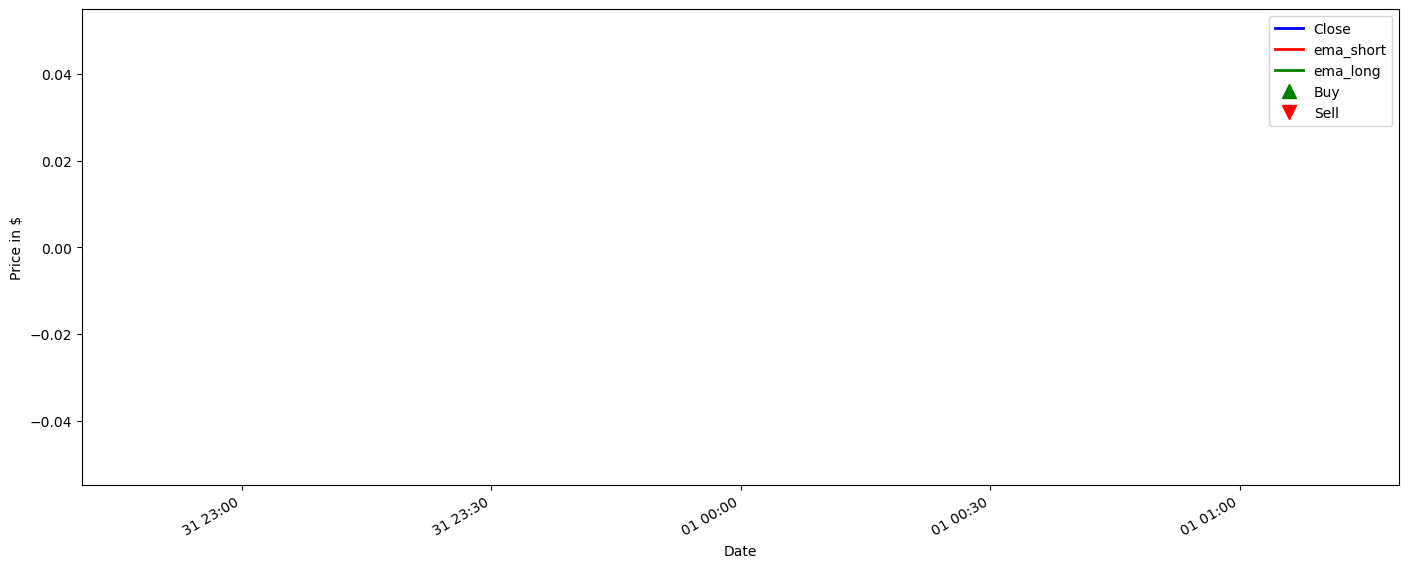

In [8]:
fig = plt.figure(figsize=(17, 7))
ax1 = fig.add_subplot(111, ylabel="Price in $")

goog_df["Close"].plot(ax=ax1,color="b", lw=2.)
goog_df["ema_short"].plot(ax=ax1,color="r", lw=2.)
goog_df["ema_long"].plot(ax=ax1,color="g", lw=2.)

ax1.plot(goog_df.loc[goog_df.crossover == 1.0].index, goog_df.Close[goog_df.crossover == 1.0], "^", markersize=10, color="g")
ax1.plot(goog_df.loc[goog_df.crossover == -1.0].index, goog_df.Close[goog_df.crossover == -1.0], "v", markersize=10, color="r")

plt.legend(["Close","ema_short","ema_long","Buy","Sell"])
plt.show("Google EMA Positions")